<h1 style="text-align: center;">📘 Baseline_Follow up Indonesia Data Processing and Analysis</h1>

This notebook documents the process of preparing and analyzing data collected from the **GG8 Baseline and Follow-up survey** conducted in **Indonesia**. It was administered in two distinct cohorts: **Year 1** and **Year 2**, with each year including data collected at **baseline** and at **follow-up** of the training interventions. 

The aim of this analysis is to:
- Conduct a **descriptive analysis**
- Evaluate the **socio-economic data** (Module A, Module B)
- Assess **transformed outcome questions** (Module C)
## 📂 Notebook Structure

This notebook is organized into **four main sections**:

1. **🔗 Dataset Concatenation**  
   This section outlines the steps and operations used to create a concatenated dataset from the four individual datasets.

2. **🔧 Data Transformation**  
   After concatenation, this section describes the transformations applied to prepare the data for analysis.

3. **📊 Youth Demographics**  
   Presents a descriptive overview of the demographic characteristics of the youth surveyed.

4. **📈 Transformed Outcomes**  
   Analyzes the changes in responses to the transformed outcome questions between baseline an follow-up.

 ✅ **Descriptive Analysis**

---

## 🧰 Tools & Libraries

This notebook uses Python libraries such as:
- `pandas` for data manipulation  
- `matplotlib` and `seaborn` for visualization  
- `scipy.stats` for statistical analysisIndonesia.

## 📦 1. Creating a single concatenated dataset

---

In [3]:
# importing pandas library
import pandas as pd

In [4]:
path1 = "D:/S2S_FE/Indonesia_data/indonesia_y1_baseline.csv"
path2 = "D:/S2S_FE/Indonesia_data/indonesia_y1_followup.csv"
path3 = "D:/S2S_FE/Indonesia_data/indonesia_y2_baseline.csv"
path4 = "D:/S2S_FE/Indonesia_data/indonesia_y2_followup.csv"

In [5]:
# Load the datasets using ISO-8859-1 encoding
y1_baseline = pd.read_csv(path1, encoding="ISO-8859-1")
y1_follow = pd.read_csv(path2, encoding="ISO-8859-1")
y2_baseline = pd.read_csv(path3, encoding="ISO-8859-1")
y2_follow = pd.read_csv(path4, encoding="ISO-8859-1")

In [6]:
# Validate column consistency
datasets = {
    "Y1_baseline": y1_baseline,
    "Y1_follow": y1_follow,
    "Y2_baseline": y2_baseline,
    "Y2_follow": y2_follow
}

for name, df in datasets.items():
    print(f"{name}: {df.shape} columns: {list(df.columns[:5])}...")  # Show first 5 columns

# Ensure all datasets have the same columns
column_sets = {name: set(df.columns) for name, df in datasets.items()}
if len(set(map(tuple, column_sets.values()))) == 1:
    print("\n✅ All datasets have the same column structure!")
else:
    print("\n⚠️ Column mismatch detected between datasets!")

Y1_baseline: (1189, 115) columns: ['class', 'field_study', 'id', 'A4', 'A5']...
Y1_follow: (1189, 115) columns: ['class', 'field_study', 'id', 'A4', 'A5']...
Y2_baseline: (572, 115) columns: ['class', 'field_study', 'id', 'A4', 'A5']...
Y2_follow: (572, 115) columns: ['class', 'field_study', 'id', 'A4', 'A5']...

✅ All datasets have the same column structure!


In [7]:
# Create a DataFrame to store column data types
dtype_dict = {}
for name, df in datasets.items():
    dtype_dict[name] = df.dtypes.astype(str)  # Convert data types to string for storage

dtype_df = pd.DataFrame(dtype_dict)

# Save to CSV for review
dtype_df.to_csv("D:/S2S_FE/Indonesia_data/column_data_types.csv", index=True)

# Display first 30 rows of data type table
print(dtype_df.head(15))

            Y1_baseline Y1_follow Y2_baseline Y2_follow
class             int64    object       int64    object
field_study      object    object      object    object
id                int64     int64       int64     int64
A4               object    object      object    object
A5               object    object      object   float64
school           object    object      object    object
B1               object    object      object    object
ca               object    object      object    object
B2               object     int64     float64     int64
B3               object     int64     float64     int64
B4.1             object   float64     float64   float64
B4.2             object   float64     float64   float64
B4.3             object   float64     float64   float64
B4.4             object   float64     float64   float64
B4.5             object   float64     float64   float64


In [8]:
# Function to drop columns containing 'Sebutkan'
def drop_sebutkan_cols(df):
    return df.loc[:, ~df.columns.str.contains("Sebutkan", case=False, na=False)]

# Apply to all your datasets
y1_baseline = drop_sebutkan_cols(y1_baseline)
y1_follow = drop_sebutkan_cols(y1_follow)
y2_baseline = drop_sebutkan_cols(y2_baseline)
y2_follow = drop_sebutkan_cols(y2_follow)


In [9]:
# Clean the datasets and avoid the warning by using .copy()
y1_baseline = drop_sebutkan_cols(y1_baseline)
y1_follow = drop_sebutkan_cols(y1_follow)
y2_baseline = drop_sebutkan_cols(y2_baseline)
y2_follow = drop_sebutkan_cols(y2_follow)

In [10]:
# Add new columns to y1 for indicating year1 and baseline for all rows
y1_baseline["year"] = "year1"
y1_baseline["type"] = "baseline"

# Add new columns to y1 for indicating year1 and follow for all rows
y1_follow["year"] = "year1"
y1_follow["type"] = "follow"

# Add new columns to y2 for indicating year2 and baseline for all rows
y2_baseline["year"] = "year2"
y2_baseline["type"] = "baseline"

# Add new columns to y2 for indicating year1 and follow for all rows
y2_follow["year"] = "year2"
y2_follow["type"] = "follow"

In [11]:
### Checking retention betweeen baseline &  follow in year 1

In [12]:
# Check if 'ID' column exists in both datasets
if "id" in y1_baseline.columns and "id" in y1_follow.columns:
    pre_ids = set(y1_baseline["id"])
    post_ids = set(y1_follow["id"])
    
    # Find common IDs
    common_ids = pre_ids.intersection(post_ids)
    
    print(f"\n✅ Identical IDs count in Y1_baseline and Y1_follow: {len(common_ids)}")
else:
    print("\n⚠️ 'ID' column not found in one or both Y1 datasets!")


✅ Identical IDs count in Y1_baseline and Y1_follow: 1189


In [13]:
### Checking retention betweeen baseline and follow in year 2

In [14]:
# Check if 'ID' column exists in both datasets
if "id" in y2_baseline.columns and "id" in y2_follow.columns:
    pre_ids = set(y2_baseline["id"])
    post_ids = set(y2_follow["id"])
    
    # Find common IDs
    common_ids = pre_ids.intersection(post_ids)
    
    print(f"\n✅ Identical IDs count in Y2_baseline and Y2_follow: {len(common_ids)}")
else:
    print("\n⚠️ 'ID' column not found in one or both Y2 datasets!")


✅ Identical IDs count in Y2_baseline and Y2_follow: 572


In [15]:
# CHECKING TO SEE IF THERE ARE DUPLICATE ID IN THE DATASET

# Function to check and print duplicate IDs in a dataset
def check_duplicate_ids(df, name="dataset"):
    id_counts = df['id'].value_counts()
    duplicate_ids = id_counts[id_counts > 1]
    if not duplicate_ids.empty:
        print(f"\nDuplicate IDs found in {name}:")
        print(duplicate_ids)
    else:
        print(f"\nNo duplicate IDs found in {name}.")

# Run the check for each dataset
check_duplicate_ids(y1_baseline, "y1_baseline")
check_duplicate_ids(y1_follow, "y1_follow")
check_duplicate_ids(y2_baseline, "y2_baseline")
check_duplicate_ids(y2_follow, "y2_follow")


No duplicate IDs found in y1_baseline.

No duplicate IDs found in y1_follow.

No duplicate IDs found in y2_baseline.

No duplicate IDs found in y2_follow.


In [16]:
# CHECKING MISSING VALUE IN SOCIO-ECONOMIC COLUMN


# DefinING  the list of columns of interested in
cols = ['class', 'field_study', 'id', 'A4', 'A5', 'school', 'B1', 'ca', 'B2', 'B3',
        'B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6',
        'B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10']

# datasets into a dictionary to loop over them
datasets = {
    "y1_baseline": y1_baseline,
    "y1_follow": y1_follow,
    "y2_baseline": y2_baseline,
    "y2_follow": y2_follow
}

# Loop through and print missing value counts for the selected columns
for name, df in datasets.items():
    print(f"\nMissing values in {name}:")
    print(df[cols].isna().sum())


Missing values in y1_baseline:
class          0
field_study    0
id             0
A4             0
A5             0
school         0
B1             0
ca             0
B2             0
B3             0
B4.1           0
B4.2           0
B4.3           0
B4.4           0
B4.5           0
B4.6           0
B5.1           0
B5.2           0
B5.3           0
B5.4           0
B5.5           0
B5.6           0
B5.7           0
B5.8           0
B5.9           0
B5.10          0
dtype: int64

Missing values in y1_follow:
class             0
field_study       0
id                0
A4                0
A5                0
school            0
B1                0
ca                0
B2                0
B3                0
B4.1           1189
B4.2           1189
B4.3           1189
B4.4           1189
B4.5           1189
B4.6           1189
B5.1              0
B5.2              0
B5.3              0
B5.4              0
B5.5              0
B5.6              0
B5.7              0
B5.8              0
B5.

__Note on Missing Data:__
Both follow-up surveys are missing data on disabilities. However, since this is a panel survey, we assumed that disability status remains the same as reported at baseline. Therefore, we can impute the missing values in the follow-ups using the baseline data.

That said, we also identified that the Year 2 baseline contains 15 incomplete cases, ranging from variable B1 (date of birth) to B5.10 (house – ceramic flooring). These 15 cases must be removed from the Year 2 baseline before using it to impute disability data in the corresponding follow-up.

In [18]:
# FILLING MISSING VALUE IN YEAR 1 FOR DISABILITIES FOR FOLLOW USING  BASELINE WE HAVE PANEL DATA

# List of columns to fill
cols_to_fill = ['B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6']

# Step 1: Extract just the id and those columns from baseline
baseline_subset = y1_baseline[["id"] + cols_to_fill].drop_duplicates()

# Step 2: Merge with y2_follow on id
y1_follow = y1_follow.merge(baseline_subset, on="id", how="left", suffixes=("", "_baseline"))

# Step 3: Fill missing values for each column
for col in cols_to_fill:
    y1_follow[col] = y1_follow[col].fillna(y1_follow[f"{col}_baseline"])
    y1_follow.drop(columns=[f"{col}_baseline"], inplace=True)

# checking missing values in y1_follow
y1_follow[['B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6']].isna().sum()  

B4.1    0
B4.2    0
B4.3    0
B4.4    0
B4.5    0
B4.6    0
dtype: int64

In [19]:
# 15 CASES DROP & FILLING MISSING VALUE IN YEAR 2 FOR DISABILITIES FOR FOLLOW USING  BASELINE WE HAVE PANEL DATA

# STEP 1: Flag incomplete baseline cases (those with missing B5.1)
y2_baseline["is_complete"] = ~y2_baseline["B5.1"].isna()
print(f"Total baseline cases: {y2_baseline.shape[0]}")
print(f"Complete baseline cases: {y2_baseline['is_complete'].sum()}")

# STEP 2: Prepare to impute disability data in the follow-up using only complete baseline cases
cols_to_fill = ['B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6']

# Extract only ID and disability-related columns from complete baseline
baseline_complete = y2_baseline[y2_baseline["is_complete"]][["id"] + cols_to_fill].drop_duplicates()

# STEP 3: Merge complete baseline disability data into the follow-up data
y2_follow = y2_follow.merge(baseline_complete, on="id", how="left", suffixes=("", "_baseline"))

# STEP 4: Fill missing disability values in follow-up from the baseline
for col in cols_to_fill:
    y2_follow[col] = y2_follow[col].fillna(y2_follow[f"{col}_baseline"])
    y2_follow.drop(columns=[f"{col}_baseline"], inplace=True)

# STEP 5: Check remaining missing values
missing_counts = y2_follow[cols_to_fill].isna().sum()
print("\nRemaining missing values after filling from complete baseline:")
print(missing_counts)

# STEP 6: Drop follow-up rows where disability data could not be filled
before_drop = y2_follow.shape[0]
y2_follow = y2_follow[~y2_follow[cols_to_fill[0]].isna()]
after_drop = y2_follow.shape[0]
print(f"\nDropped {before_drop - after_drop} follow-up rows due to missing disability data.")



Total baseline cases: 572
Complete baseline cases: 557

Remaining missing values after filling from complete baseline:
B4.1    15
B4.2    15
B4.3    15
B4.4    15
B4.5    15
B4.6    15
dtype: int64

Dropped 15 follow-up rows due to missing disability data.


In [20]:
# checking missing values in y2_follow for disabilitis after treatment
y2_follow[['B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6']].isna().sum()  

B4.1    0
B4.2    0
B4.3    0
B4.4    0
B4.5    0
B4.6    0
dtype: int64

In [21]:
y2_baseline = y2_baseline.dropna(subset=['B1'])

In [22]:
# RE-CHECKING MISSING VALUE IN SOCIO-ECONOMIC COLUMNS AFTER TREATEMENT


# DefinING  the list of columns of interested in
cols = ['class', 'field_study', 'id', 'A4', 'A5', 'school', 'B1', 'ca', 'B2', 'B3',
        'B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6',
        'B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10']

# datasets into a dictionary to loop over them
datasets = {
    "y1_baseline": y1_baseline,
    "y1_follow": y1_follow,
    "y2_baseline": y2_baseline,
    "y2_follow": y2_follow
}

# Loop through and print missing value counts for the selected columns
for name, df in datasets.items():
    print(f"\nMissing values in {name}:")
    print(df[cols].isna().sum())


Missing values in y1_baseline:
class          0
field_study    0
id             0
A4             0
A5             0
school         0
B1             0
ca             0
B2             0
B3             0
B4.1           0
B4.2           0
B4.3           0
B4.4           0
B4.5           0
B4.6           0
B5.1           0
B5.2           0
B5.3           0
B5.4           0
B5.5           0
B5.6           0
B5.7           0
B5.8           0
B5.9           0
B5.10          0
dtype: int64

Missing values in y1_follow:
class          0
field_study    0
id             0
A4             0
A5             0
school         0
B1             0
ca             0
B2             0
B3             0
B4.1           0
B4.2           0
B4.3           0
B4.4           0
B4.5           0
B4.6           0
B5.1           0
B5.2           0
B5.3           0
B5.4           0
B5.5           0
B5.6           0
B5.7           0
B5.8           0
B5.9           0
B5.10          0
dtype: int64

Missing values in y2_baseli

## 🛠️ 2. Pre-processing the concatenated baseline and follow up dataset

In [24]:
# CONCATENATING THE DATASETS

df1 = pd.concat([y1_baseline, y1_follow, y2_baseline, y2_follow], ignore_index=True)

In [25]:
# Define custom categorical order for sorting
df1["year"] = pd.Categorical(df1["year"], categories=["year1", "year2"], ordered=True)
df1["type"] = pd.Categorical(df1["type"], categories=["baseline", "follow"], ordered=True)

# Sort by year first, then by type
df1 = df1.sort_values(by=["year", "type"]).reset_index(drop=True)

# Define the desired column order
column_order = ["year", "type"] + [col for col in df1.columns if col not in ["year", "type"]]

# Reorder the DataFrame
df1 = df1[column_order]

# View the first 2 rows
df1.head(2)


,year,type,class,field_study,id,A4,A5,school,B1,ca,...,F22,F23,F31,F32,F33,F34,F35,Total Resiliency,Carrer Readiness,is_complete
0,year1,baseline,12,TATA BOGA,2750,Jawa Timur,Lumajang,SMKN 2 LUMAJANG,3/29/2005,2/2/2023,...,1,keahlian yg kita miliki,1,1,1,2,1,3.0,0.525,NaN
1,year1,baseline,12,TATA BOGA,2765,Jawa Timur,Lumajang,SMKN 2 LUMAJANG,10/12/2004,2/2/2023,...,1,MEMASAK,1,2,2,2,1,2.6,0.7125,NaN


In [26]:
column_headers = df1.columns.tolist()
print(column_headers)

['year', 'type', 'class', 'field_study', 'id', 'A4', 'A5', 'school', 'B1', 'ca', 'B2', 'B3', 'B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6', 'B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10', 'C0', 'C00', 'C00.1', 'C00.2', 'C00.3', 'C00.4', 'C00.5', 'C01', 'C02', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C110', 'C111', 'C112', 'C113.1', 'C113.2', 'C113.3', 'C113.4', 'C113.5', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C210', 'C211', 'C212', 'C213', 'C214', 'C31', 'C32', 'C33', 'C41', 'C42', 'C43', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'Be', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'F11', 'F12', 'F21', 'F22', 'F23', 'F31', 'F32', 'F33', 'F34', 'F35', 'Total Resiliency', 'Carrer Readiness', 'is_complete']


### Creating a disability column 

To create a simplified column called has_disability that summarizes the responses from six disability-related questions (B4.1 to B4.6) for each individual. Logic Behind has_disability:

If any of the six responses is:

    * 2 (some difficulty)

    * 3 (a lot of difficulty)

    * 4 (cannot do at all)
        → then has_disability = 1 (the person has a disability)

If any response is:

    * 7 (refused to answer)

    * 9 (don’t know)
        → then has_disability = 99 (response is inconclusive)

If all six responses are: 1 (no difficulty) → then has_disability = 0 (no disability)

In [28]:
# List of disability-related columns
disability_cols = ['B4.1', 'B4.2', 'B4.3', 'B4.4', 'B4.5', 'B4.6']

# Function to classify disability status
# 1 = has disability (any 2, 3, or 4)
# 0 = no disability (all 1s)
# 99 = refused or don't know (any 7 or 9)
def classify_disability(row):
    if any(row[col] in [7, 9] for col in disability_cols):
        return 99
    elif any(row[col] in [2, 3, 4] for col in disability_cols):
        return 1
    else:
        return 0

# Apply the function to your dataset (e.g., y2_follow or any DataFrame you're working with)
df1["has_disability"] = df1.apply(classify_disability, axis=1)

In [29]:
# Checking the value for gender
df1['B3'].value_counts()

B3
1    1336
2     964
1     746
2     433
x       8
4       3
4       2
Name: count, dtype: int64

I noticed that there are 8 gender cases with values outside the acceptable range, so I need to drop them. Additionally, some values are in float format and should be converted to integers.

In [31]:
# Drop rows where gender == 'x'
df1 = df1[df1['B3'] != 'x']

# Convert B3 float columns to integer
df1["B3"] = df1["B3"].astype(int)

In [32]:
# Checking value type for assets 
df1[['B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10']].dtypes

B5.1     object
B5.2     object
B5.3     object
B5.4     object
B5.5     object
B5.6     object
B5.7     object
B5.8     object
B5.9     object
B5.10    object
dtype: object

In [33]:
# Convert the selected float columns to integer
cols_to_convert = ['B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10']
df1[cols_to_convert] = df1[cols_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [34]:
# re-Checking value type for assets 
df1[['B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10']].dtypes

B5.1     Int64
B5.2     Int64
B5.3     Int64
B5.4     Int64
B5.5     Int64
B5.6     Int64
B5.7     Int64
B5.8     Int64
B5.9     Int64
B5.10    Int64
dtype: object

In [35]:
# Checking the value count of assets 
df1[ 'B5.2'].value_counts()

B5.2
2    1756
1    1701
9      18
3       9
Name: count, dtype: Int64

In [36]:
#recoding assets column

cols_to_recode = ['B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10']

# Your recoding rule
recode_map = {1: 1, 2: 0, 3: 99, 9: 99}

# Apply the mapping across the columns
df1[cols_to_recode] = df1[cols_to_recode].applymap(lambda x: recode_map.get(x, x))


In [37]:
df1[ 'B5.2'].value_counts()

B5.2
0     1756
1     1701
99      27
Name: count, dtype: int64

In [38]:
# CREATING AN ASSET INDEX 

cols_to_sum = ['B5.1', 'B5.2', 'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.8', 'B5.9', 'B5.10'] 

# Set up the condition: if any value in the row is 99 → return NaN; else sum 0/1 values
df1['asset_index'] = df1[cols_to_sum].apply(
    lambda row: row.sum() if 99 not in row.values else pd.NA,
    axis=1
).astype('Int64')   # use Int64 if you want to preserve NA


In [39]:
# Checking data type of Age 
df1['B2'].dtype

dtype('O')

In [40]:
# Convert B2 object  Age columns to integer
df1["B2"] = df1["B2"].astype(int)

In [41]:
# Checking data type of C0 (have you graduated from edu system?) 
df1['C0'].dtype

dtype('O')

In [42]:
# Convert C0 object columns to integer
df1["C0"] = df1["C0"].astype(int)

In [43]:
#recoding C0
edu_map = {1: 'Yes', 2: 'No'}
df1['C0'] = df1['C0'].map(edu_map)

In [44]:
# Checking data type of C00.1 (currently employed) 
df1['C00.1'].dtype

dtype('O')

In [45]:
df1['C00.1'].value_counts()

C00.1
0        1814
FALSE    1116
1         489
TRUE       65
Name: count, dtype: int64

the column C00.1 in the DataFrame contains mixed data types: numeric (0, 1) and boolean-like strings ('FALSE', 'TRUE'). So I will first treat everything as inteers (0/1) then as Yes and No

In [47]:
df1['C00.1_clean'] = df1['C00.1'].replace({'FALSE': 0, 'TRUE': 1})
#recoding C001
df1['C00.1'] = df1['C00.1'].map({0: 'No', 1: 'Yes'})

In [48]:
# Checking data type of C00.2 (Owned Business) 
df1['C00.2'].dtype

dtype('O')

In [49]:
df1['C00.2'].value_counts()

C00.2
0        2236
FALSE    1141
1          67
TRUE       40
Name: count, dtype: int64

In [50]:
#recoding C002
df1['C00.2'] = df1['C00.2'].replace({'FALSE': 0, 'TRUE': 1})
df1['C00.2'] = df1['C00.2'].map({0: 'No', 1: 'Yes'})

In [51]:
#recoding C003, C004 & C005

df1['C00.3'] = df1['C00.3'].replace({'FALSE': 0, 'TRUE': 1})
df1['C00.3'] = df1['C00.3'].map({0: 'No', 1: 'Yes'})

df1['C00.4'] = df1['C00.4'].replace({'FALSE': 0, 'TRUE': 1})
df1['C00.4'] = df1['C00.4'].map({0: 'No', 1: 'Yes'})

df1['C00.5'] = df1['C00.5'].replace({'FALSE': 0, 'TRUE': 1})
df1['C00.5'] = df1['C00.5'].map({0: 'No', 1: 'Yes'})

## 📈 3. Socio-Demographic data analysis

In [53]:
# Creating two sub datasets( Baseline and  Follow up) for the previous concatenated dataset 
df1_baseline = df1[df1["type"] == "baseline"]
df1_follow = df1[df1["type"] == "follow"]

#### % youth with no (and with) disabilities

In [55]:
df1_baseline['has_disability'].value_counts(normalize=True) * 100

has_disability
0     77.905639
1     19.505178
99     2.589183
Name: proportion, dtype: float64

#### % youth by gender

In [57]:
df1_baseline["B3"].value_counts(normalize=True) *100

B3
1    59.551208
2    40.218642
4     0.230150
Name: proportion, dtype: float64

#### % of youth by gender and disabilities 

In [59]:
gender_disability = pd.crosstab(df1_baseline['B3'], df1_baseline['has_disability'], normalize='index') *100 # row-wise
gender_disability

has_disability,0,1,99
B3,,,
1,80.483092,17.294686,2.222222
2,74.248927,22.746781,3.004292
4,50.000000,25.000000,25.000000


#### % youth by assest index  at baseline and follow up

In [61]:
# Percentage of youth at baseline by asset index
df1_baseline["asset_index"].value_counts(normalize=True).sort_values() *100


asset_index
1      0.217549
2      0.435098
3      1.740392
10     4.060914
4      5.003626
5     10.804931
9      13.19797
6      20.08702
8     22.117476
7     22.335025
Name: proportion, dtype: Float64

In [62]:
#  Descriptive statistic for asset index at baseline
df1_baseline["asset_index"].describe()

count      1379.0
mean      6.93546
std      1.631346
min           1.0
25%           6.0
50%           7.0
75%           8.0
max          10.0
Name: asset_index, dtype: Float64

In [63]:
# Percentage of youth at follow up by asset inde
df1_follow["asset_index"].value_counts(normalize=True).sort_values() *100

asset_index
1      0.264026
2       0.39604
3      1.716172
4      4.026403
10     4.092409
5      8.778878
9     12.343234
6     20.330033
8     22.442244
7     25.610561
Name: proportion, dtype: Float64

In [64]:
#  Descriptive statistic for asset index at follow up
df1_follow["asset_index"].describe()

count      1515.0
mean     6.990099
std      1.572731
min           1.0
25%           6.0
50%           7.0
75%           8.0
max          10.0
Name: asset_index, dtype: Float64

In [65]:
# CREATING A TABLE FOR PERCENTAGE OF YOUTH BY ASSET INDEX AT BOTH BASELINE AND FOLLOW UP 

# Make sure both are pandas Series with indexes
baseline_pct = df1_baseline["asset_index"].value_counts(normalize=True).sort_index() * 100
follow_pct = df1_follow["asset_index"].value_counts(normalize=True).sort_index() * 100

# Combine using pd.concat to ensure alignment
asset_comparison = pd.concat([baseline_pct, follow_pct], axis=1)
asset_comparison.columns = ["Baseline (%)", "Follow-up (%)"]
asset_comparison = asset_comparison.fillna(0)  # in case some categories are missing
asset_comparison.head(10)

,Baseline (%),Follow-up (%)
asset_index,,
1,0.217549,0.264026
2,0.435098,0.39604
3,1.740392,1.716172
4,5.003626,4.026403
5,10.804931,8.778878
6,20.08702,20.330033
7,22.335025,25.610561
8,22.117476,22.442244
9,13.19797,12.343234


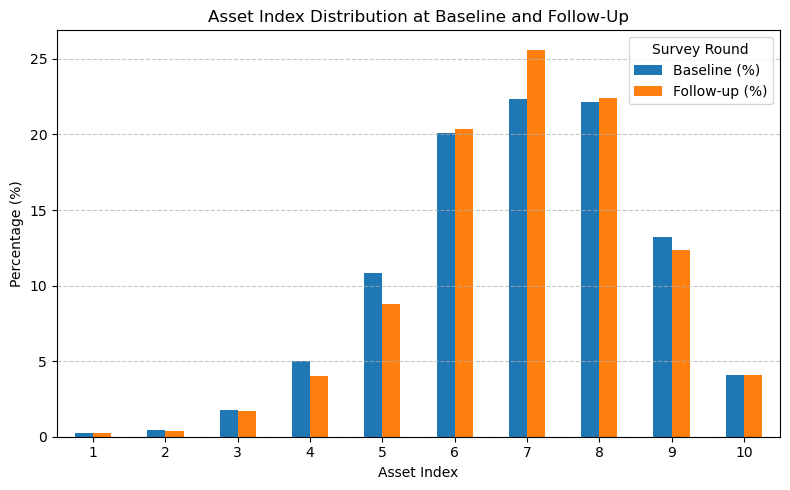

In [66]:
# Plot side-by-side bar chart

import matplotlib.pyplot as plt
ax = asset_comparison.plot(kind='bar', figsize=(8, 5), rot=0)

# Step 4: Add labels and title
plt.title("Asset Index Distribution at Baseline and Follow-Up")
plt.ylabel("Percentage (%)")
plt.xlabel("Asset Index")
plt.legend(title="Survey Round")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

####  Youth Age at baseline 

In [68]:
# Descriptive Statistics
df1_baseline['B2'].describe()

count    1738.000000
mean       16.810702
std         2.203091
min        -2.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        22.000000
Name: B2, dtype: float64

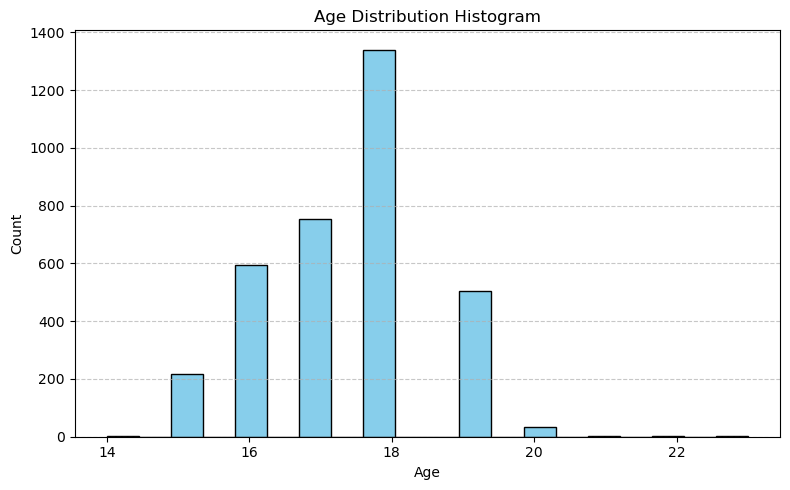

In [69]:
# Filter out ages less than 5
df1_baseline_filtered = df1[df1['B2'] >= 5]


plt.figure(figsize=(8, 5))
plt.hist(df1_baseline_filtered['B2'].dropna(), bins=20, color='skyblue', edgecolor='black')

plt.title("Age Distribution Histogram")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

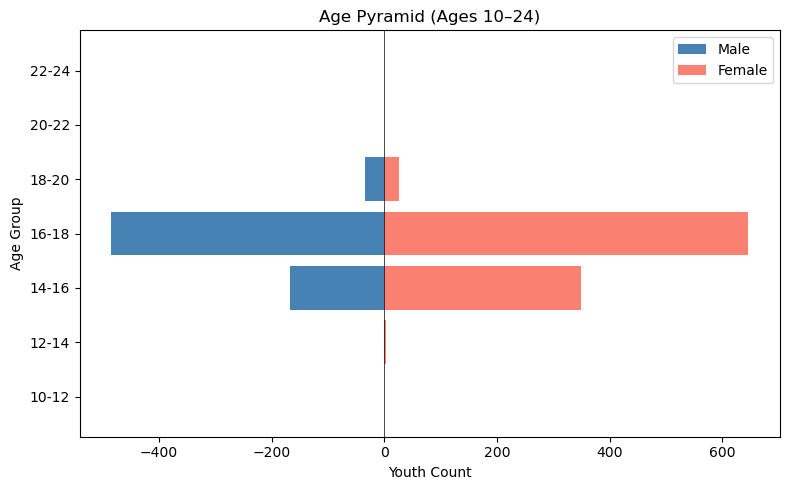

In [70]:
# Age pyramidal by gender

# Step 1: Recode gender and exclude unknowns
gender_map = {1: 'Female', 2: 'Male'}
df1_baseline = df1_baseline[df1_baseline['B3'].isin([1, 2])]  # Exclude unknown gender (4)
df1_baseline['B3'] = df1_baseline['B3'].map(gender_map)

# Step 2: Exclude ages below 10
df1_baseline = df1_baseline[df1_baseline['B2'] >= 10]

# Step 3: Define age bins for ages 10 to 24

age_bins = [10, 12, 14, 16, 18, 20, 22, 24]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]}" for i in range(len(age_bins)-1)]
df1_baseline['age_group'] = pd.cut(df1_baseline['B2'], bins=age_bins, labels=age_labels, right=True)

# Step 4: Group by age group and gender
pyramid = df1_baseline.groupby(['age_group', 'B3']).size().unstack(fill_value=0)

# Step 5: Invert male values for pyramid
pyramid['Male'] = -pyramid.get('Male', 0)

# Step 6: Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bars
ax.barh(pyramid.index, pyramid['Male'], color='steelblue', label='Male')
ax.barh(pyramid.index, pyramid['Female'], color='salmon', label='Female')

# Formatting
ax.set_xlabel("Youth Count")
ax.set_ylabel("Age Group")
ax.set_title("Age Pyramid (Ages 10–24)")
ax.legend()
ax.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

## 📈 4. Transformed outcomes data analysis

#### Percentage of youth  at baseline who graduated from the education system

In [73]:
df1_baseline["C0"].value_counts(normalize=True).sort_values() *100

C0
Yes     0.525701
No     99.474299
Name: proportion, dtype: float64

#### Percentage of youth at baseline who graduated from the education system by gender

In [75]:
gender_system_baseline = pd.crosstab(df1_baseline['B3'], df1_baseline['C0'], normalize='index')* 100  # row-wise
gender_system_baseline

C0,No,Yes
B3,,
Female,99.609756,0.390244
Male,99.272198,0.727802


#### Percentage of youth at follow up who graduated from the education system by gender

In [77]:
gender_system_follow = pd.crosstab(df1_follow['B3'], df1_follow['C0'], normalize='index')* 100  # row-wise
gender_system_follow

C0,No,Yes
B3,,
1,37.917861,62.082139
2,28.939828,71.060172
4,100.000000,0.000000


#### Percentage of youth  at follow up who graduated from the education system

In [79]:
df1_follow["C0"].value_counts(normalize=True).sort_values() *100

C0
No     34.364261
Yes    65.635739
Name: proportion, dtype: float64

#### Percentage of youth employed at baseline

In [81]:
df1_baseline["C00.1"].value_counts(normalize=True).sort_values() *100

C00.1
Yes     3.669725
No     96.330275
Name: proportion, dtype: float64

#### Percentage of youth employed at baseline by gender

In [83]:
gender_employed_baseline = pd.crosstab(df1_baseline['B3'], df1_baseline['C00.1'], normalize='index')* 100  # row-wise
gender_employed_baseline

C00.1,No,Yes
B3,,
Female,96.167247,3.832753
Male,96.511628,3.488372


#### Percentage of youth employed at follow up by gender

In [85]:
gender_employed_follow = pd.crosstab(df1_follow['B3'], df1_follow['C00.1'], normalize='index')* 100  # row-wise
gender_employed_follow

C00.1,No,Yes
B3,,
1,77.077364,22.922636
2,67.335244,32.664756
4,100.000000,0.000000


#### Percentage of youth employed at follow up

In [87]:
df1_follow["C00.1"].value_counts(normalize=True).sort_values() *100

C00.1
Yes    26.804124
No     73.195876
Name: proportion, dtype: float64

#### Percentage of youth Owned business at baseline

In [89]:
df1_baseline["C00.2"].value_counts(normalize=True).sort_values() *100

C00.2
Yes     2.920561
No     97.079439
Name: proportion, dtype: float64

#### Percentage of youth Owned business at follow up

In [91]:
df1_follow["C00.2"].value_counts(normalize=True).sort_values() *100

C00.2
Yes     3.207331
No     96.792669
Name: proportion, dtype: float64

#### Percentage of youth studying at baseline


In [93]:
df1_baseline["C00.3"].value_counts(normalize=True).sort_values() *100

C00.3
No      1.985981
Yes    98.014019
Name: proportion, dtype: float64

#### Percentage of youth studying at follow up

In [95]:
df1_follow["C00.3"].value_counts(normalize=True).sort_values() *100

C00.3
Yes    48.682703
No     51.317297
Name: proportion, dtype: float64

#### Percentage of youth looking for job at baseline¶

In [97]:
df1_baseline["C00.4"].value_counts(normalize=True).sort_values() *100

C00.4
Yes     9.404206
No     90.595794
Name: proportion, dtype: float64

#### Percentage of youth looking for job at follow up

In [99]:
df1_follow["C00.4"].value_counts(normalize=True).sort_values() *100

C00.4
Yes    25.028637
No     74.971363
Name: proportion, dtype: float64

#### Percentage of youth not studying, not working & looking for job at baseline¶

In [101]:
df1_baseline["C00.5"].value_counts(normalize=True).sort_values() *100

C00.5
Yes     0.817757
No     99.182243
Name: proportion, dtype: float64

#### Percentage of youth not studying, not working & looking for job at follow up

In [103]:
df1_follow["C00.5"].value_counts(normalize=True).sort_values() *100

C00.5
Yes     2.348225
No     97.651775
Name: proportion, dtype: float64